# 使用Functional API打造具有分歧的神經網路

In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, Button


# 讀入建構神經網路用到的 Keras 相關函數
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

# Keras dataset
from keras.datasets import mnist

# Keras 
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input

# Keras 建立具分歧及合併結構的神經網路模型
from keras.layers import concatenate, add
from keras.layers.core import Lambda
from keras import backend as K

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


In [2]:
# 讀入訓練資料
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()
print("There are %d training data with size %d x %d" %x_train0.shape)
print("There are %d testing  data with size %d x %d" %x_test0.shape)
x_train = x_train0.reshape(60000, 784)
x_test = x_test0.reshape(10000, 784)


# 正規化資料
x_train -= x_train.min()
x_train = x_train/x_train.max()
x_train.min(), x_train.max()

y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

There are 60000 training data with size 28 x 28
There are 10000 testing  data with size 28 x 28


## Function API 階層設置

以下是階層設置的示意圖

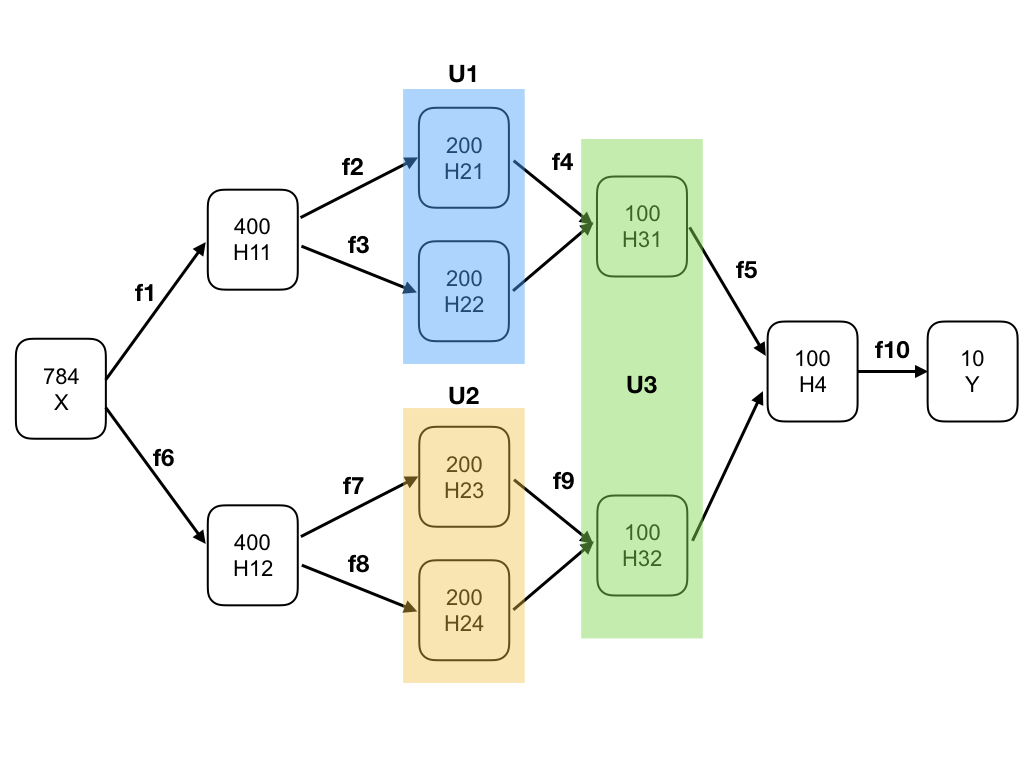

In [3]:
x = Input(shape=(784,))

# 不同階層的函數
f_1 = Dense(400, activation='sigmoid')
f_2 = Dense(200, activation='sigmoid')
f_3 = Dense(200, activation='sigmoid')
f_4 = Dense(100, activation='sigmoid')
f_5 = Dense(100, activation='sigmoid')
f_6 = Dense(400, activation='relu')
f_7 = Dense(200, activation='sigmoid')
f_8 = Dense(200, activation='relu')
f_9 = Dense(100, activation='relu')
f_10 = Dense(10, activation='softmax')

# hiden layer
h_11 = f_1(x)
h_21 = f_2(h_11)
h_22 = f_3(h_11)
u1=concatenate([h_21,h_22])
h_31 = f_4(u1)
h_12 = f_6(x)
h_23 = f_7(h_12)
h_24 = f_8(h_12)
u2=concatenate([h_23,h_24])
h_32 = f_9(u2)
u3=concatenate([h_31,h_32])
h_4 = f_5(u3)

y = f_10(h_4)


Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 400)          314000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 400)          314000      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 200)          80200       dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (D

In [5]:
# model training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelfit=model.fit(x_train, y_train, batch_size=128, epochs=10,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 155us/step - loss: 0.4059 - acc: 0.8831 - val_loss: 0.1639 - val_acc: 0.9534
Epoch 2/10
48000/48000 [==============================] - 7s 151us/step - loss: 0.1294 - acc: 0.9627 - val_loss: 0.1178 - val_acc: 0.9662
Epoch 3/10
48000/48000 [==============================] - 8s 172us/step - loss: 0.0851 - acc: 0.9756 - val_loss: 0.1037 - val_acc: 0.9703
Epoch 4/10
48000/48000 [==============================] - 9s 191us/step - loss: 0.0630 - acc: 0.9808 - val_loss: 0.0938 - val_acc: 0.9731
Epoch 5/10
48000/48000 [==============================] - 8s 176us/step - loss: 0.0469 - acc: 0.9854 - val_loss: 0.0859 - val_acc: 0.9747
Epoch 6/10
48000/48000 [==============================] - 8s 169us/step - loss: 0.0335 - acc: 0.9904 - val_loss: 0.0843 - val_acc: 0.9747
Epoch 7/10
48000/48000 [==============================] - 9s 194us/step - 

## 檢查準確率

In [6]:
score_fork = model.evaluate(x_test, y_test, batch_size=1000)
print('loss:',score_fork[0],'acc:',score_fork[1] )

10000/10000 [==============================] - 0s 30us/step
loss: 0.08702032882720231 acc: 0.9784000039100647


## 畫圖結果

<function matplotlib.pyplot.show(*args, **kw)>

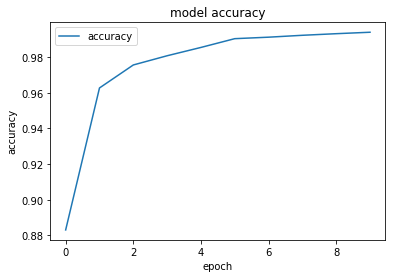

In [8]:

plt.plot(modelfit.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show